In [4]:
import qiskit
from qiskit import QuantumCircuit,transpile
import re
from qiskit.qasm2.export import dump,dumps
import math
def replace_ccz_with_ccx_h(qasm_code):
    pattern = r'ccz\s*(\w+)\[(\d+)\],?\s*(\w+)\[(\d+)\],?\s*(\w+)\[(\d+)\];'    
    def replace(match):
        reg1, q1, reg2, q2, reg3, q3 = match.groups()
        return f'h {reg3}[{q3}];\nccx {reg1}[{q1}], {reg2}[{q2}], {reg3}[{q3}];\nh {reg3}[{q3}];'
    
    modified_qasm = re.sub(pattern, replace, qasm_code)
    return modified_qasm
    
names=['nwq_boolean_satisfaction_n28',
       'nwq_boolean_satisfaction_n30',
       'nwq_boolean_satisfaction_n32',
       'nwq_boolean_satisfaction_n34',
       'nwq_binary_welded_tree_n17',
       'nwq_binary_welded_tree_n21',
       'nwq_binary_welded_tree_n25',
       'nwq_binary_welded_tree_n29',
       'grover_n9_from_python',
       'grover_n11_from_python',
       'grover_n13_from_python',
       'grover_n15_from_python',
       'hhl_n7_from_python',
       'hhl_n9_from_python',
       'hhl_n11_from_python',
       'hhl_n13_from_python',
       'shor_7_mod_15_n10_from_python',
       'shor_7_mod_15_n12_from_python',
       'shor_7_mod_15_n14_from_python',
       'shor_7_mod_15_n16_from_python',
       'nwq_square_root_n42',
       'nwq_square_root_n48',
       'nwq_square_root_n54',
       'nwq_square_root_n60',
       'nwq_statevector_n5',
       'nwq_statevector_n6',
       'nwq_statevector_n7',
       'nwq_statevector_n8',
       ]



In [6]:
for name in names:
    # qasm=read_file(f"benchmarks/{name}/{name}.ibm.qasm.preprocessed")
    with open(f"benchmarks/{name}/{name}.qasm", "r") as f:
        qasm=f.read()
    modified_qasm=replace_ccz_with_ccx_h(qasm)
    circ=QuantumCircuit.from_qasm_str(modified_qasm)
    circ=transpile(circ,basis_gates=['h','cx','x','rz','z'],optimization_level=0)
    circ.remove_final_measurements(inplace=True)
    new_qasm=dump(circ,f"benchmarks/pengyu/{name}.qasm")

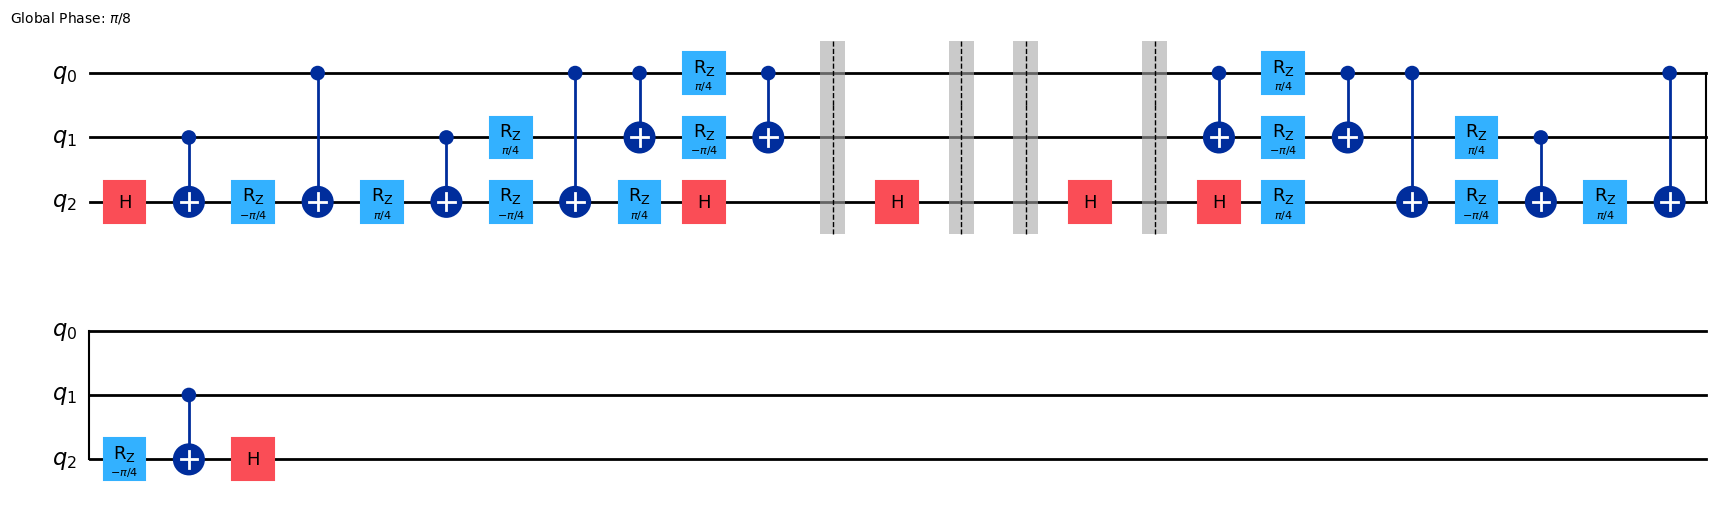

In [3]:
# circ=QuantumCircuit(3)
# circ.ccx(0,1,2)
# circ=transpile(circ,basis_gates=['h','cx','x','rz','z'],optimization_level=3)
# circ.draw()
# # append a reversed gate of itself
# circ.barrier()
# circ.h(2)
# circ.barrier()
# for ops in circ.reverse_ops():
#     circ.append(ops,circ.qubits)

# # circ=circ.decompose()
# circ.draw(output='mpl')
